<a href="https://colab.research.google.com/github/Mariana-zy/SyS-2025-2S/blob/main/Taller2/Punto_1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Punto 1.6**

**Aplicación en comunicaciones - modulación AM:** Sea la señal portadora $ c(t) = Ac * cos(2πFct) $, con $ Ac, Fc ∈ R $, y
la señal mensaje $ m(t) ∈ R $. Encuentre el espectro en frecuencia de la señal modulada en amplitud $ (AM), y(t) = \left( 1 + \frac{m(t)}{A_c} \right) c(t) $. Luego, descargue desde YouTube, 5 segundos de su canción favorita (capturando del segundo 20 al 25).

Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida y con un índice de modulación de 1). Grafique las señales en tiempo y frecuencia (magnitud) de la señal mensaje, portadora
y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada. Nota: se sugiere utilizar un canal de señal de audio para el desarrollo del ejercicio. Luego, sea el demodulador en amplitud presentado en la Figura, asumiendo $ θ0 = 0 $, determine el espectro en cada una de
las etapas del sistema. Adem´as, utilizando el fragmento de
la canci´on de Youtube, grafique cada una de las etapas principales
del de demodulaci´on en el tiempo y la frecuencia
(reproduzca el segmento de la canci´on en cada etapa). Nota:
para la etapa de filtrado pasa bajas, emplee filtrado ideal
espectral mediante FFT.

In [ ]:
# 1. Descarga de canción desde YouTube y conversión a .wav

!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz -q
!pip install soundfile -q

import os, shutil, soundfile as sf
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt

# Link de la canción
link = "https://www.youtube.com/watch?v=-zgDXIi1uYw&list=RDOwGG5fX7bxY&index=4"

# Descargar el audio en formato .mp3
!yt-dlp --extract-audio -o "audio" --audio-format mp3 --force-overwrites {link}

# Convertirlo a .wav con ffmpeg
!ffmpeg -y -i audio.mp3 output.wav

# 2. Cargar el fragmento (segundos 20 a 25)

audio, fs = sf.read("output.wav")
print("Frecuencia de muestreo:", fs, "Hz")

# Convertir a mono si el audio está en estéreo
if len(audio.shape) > 1:
    audio = audio[:,0]  # Canal izquierdo

# Extraer 5 segundos de la canción (20 a 25 s)
ti, tf = 20, 25
segmento = audio[int(ti*fs):int(tf*fs)]
t_audio = np.arange(0, len(segmento)) / fs

# Normalizar señal mensaje
mensaje = segmento / np.max(np.abs(segmento))

# Reproducir fragmento original
print("Fragmento original (5 s):")
Audio(mensaje, rate=fs)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
[youtube] Extracting URL: https://www.youtube.com/watch?v=-zgDXIi1uYw
[youtube] -zgDXIi1uYw: Downloading webpage
[youtube] -zgDXIi1uYw: Downloading android sdkless player API JSON
[youtube] -zgDXIi1uYw: Downloading web safari player API JSON
[youtube] -zgDXIi1uYw: Downloading m3u8 information
[info] -zgDXIi1uYw: Downloading 1 format(s): 251
Deleting existing file audio.mp3
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio
[download] 100% of    4.32MiB in 00:00:00 at 13.35MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir

In [ ]:
# Parámetros de modulación
Fc = 5000       # Frecuencia portadora (Hz)
Im = 1          # Índice de modulación (100%)
Ac = 1          # Amplitud de portadora

# Señal portadora
portadora = Ac * np.cos(2 * np.pi * Fc * t_audio)

# Señal modulada AM
y = (1 + Im * mensaje) * portadora

print("Reproducción de la señal AM modulada:")
Audio(y, rate=fs)

Reproducción de la señal AM modulada:


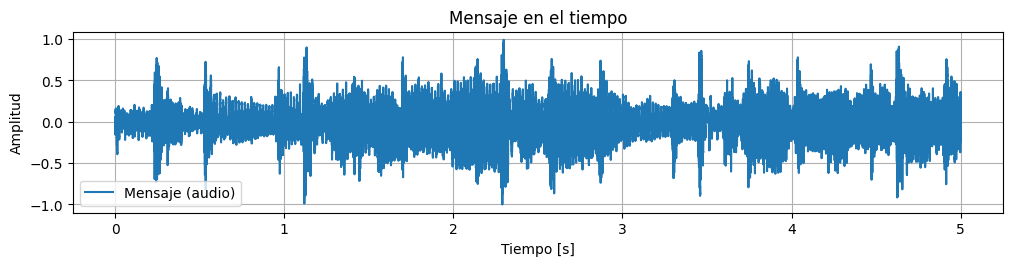

In [ ]:
# Función para obtener espectro
def espectro(x, Fs):
    N = len(x)
    X = np.fft.rfft(x)
    f = np.fft.rfftfreq(N, 1/Fs)
    return f, np.abs(X)/N

f_m, M = espectro(mensaje, fs)
f_y, Y = espectro(y, fs)

# Mensaje en el tiempo
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(t_audio, mensaje, label="Mensaje (audio)")
plt.title("Mensaje en el tiempo")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.legend(); plt.grid()

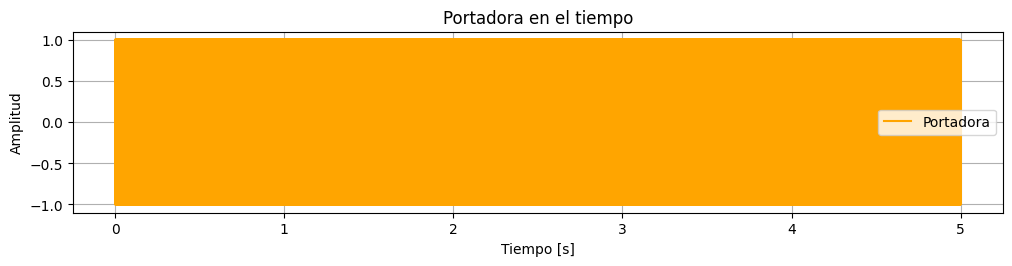

In [ ]:
# Portadora en el tiempo
plt.figure(figsize=(12,8))
plt.subplot(3,1,2)
plt.plot(t_audio, portadora, label="Portadora", color='orange')
plt.title("Portadora en el tiempo")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.legend(); plt.grid()

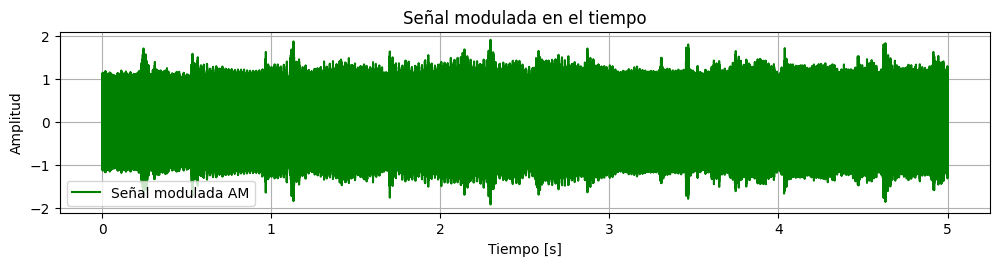

In [ ]:
# Señal modulada en el tiempo
plt.figure(figsize=(12,8))
plt.subplot(3,1,3)
plt.plot(t_audio, y, label="Señal modulada AM", color='green')
plt.title("Señal modulada en el tiempo")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.legend(); plt.grid()

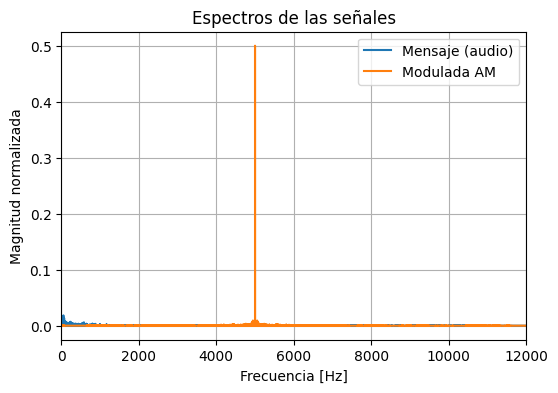

In [ ]:
# Espectros
plt.figure(figsize=(6,4))
plt.plot(f_m, M, label="Mensaje (audio)")
plt.plot(f_y, Y, label="Modulada AM")
plt.xlim(0, 12000)
plt.title("Espectros de las señales")
plt.xlabel("Frecuencia [Hz]"); plt.ylabel("Magnitud normalizada")
plt.legend(); plt.grid()
plt.show()

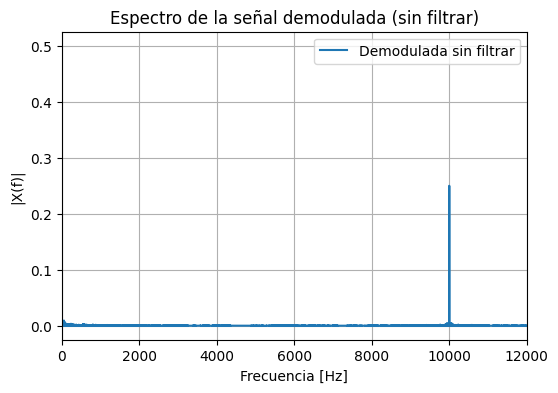

In [ ]:
# Multiplicación por portadora local
demodulada = y * portadora

# Espectro antes del filtrado
f_d, D = espectro(demodulada, fs)
plt.figure(figsize=(6,4))
plt.plot(f_d, D, label="Demodulada sin filtrar")
plt.title("Espectro de la señal demodulada (sin filtrar)")
plt.xlabel("Frecuencia [Hz]"); plt.ylabel("|X(f)|")
plt.legend(); plt.grid(); plt.xlim(0, 12000)
plt.show()

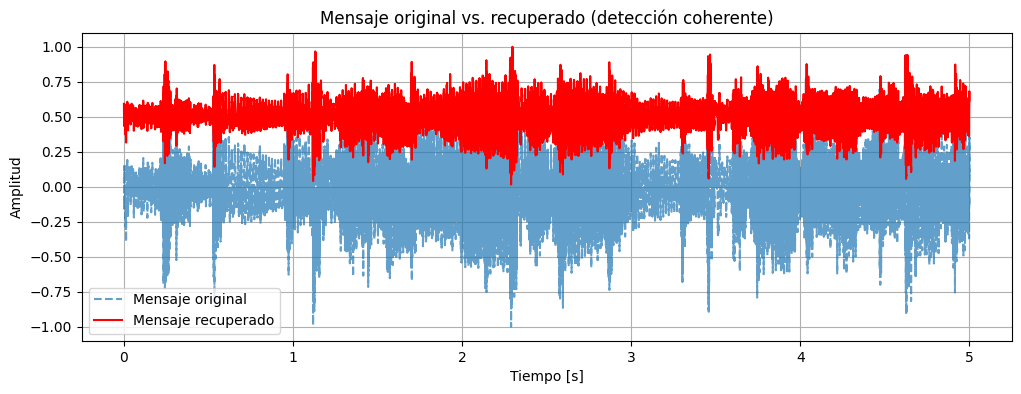

Reproducción del mensaje recuperado:


In [ ]:
# Filtro pasa bajas ideal
Xfd = np.fft.rfft(demodulada)
frecuencias = np.fft.rfftfreq(len(demodulada), 1/fs)
fcorte = 4000  # Hz (ajustar al ancho de banda del audio)
Xfd[frecuencias > fcorte] = 0
mensaje_recuperado = np.fft.irfft(Xfd)

# Normalización
mensaje_recuperado /= np.max(np.abs(mensaje_recuperado))

# Comparación visual
plt.figure(figsize=(12,4))
plt.plot(t_audio, mensaje, label="Mensaje original", linestyle="--", alpha=0.7)
plt.plot(t_audio, mensaje_recuperado, label="Mensaje recuperado", color='red')
plt.title("Mensaje original vs. recuperado (detección coherente)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.legend(); plt.grid()
plt.show()

print("Reproducción del mensaje recuperado:")
Audio(mensaje_recuperado, rate=fs)